In [ ]:
!pip install indic-transliteration

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
from indic_transliteration import sanscript
from indic_transliteration.sanscript import SchemeMap, SCHEMES, transliterate

In [ ]:
# Detail Mapping of SLP1
# data = "क, ख, ग, घ, ङ, च, छ, ज, झ, ञ, ट, ठ, ड, ढ, ड़, ण, त, थ, द, ध, न, ऩ, प, फ, ब, भ, म, य, र, ल, व, श, ष, स, ह"
# print(transliterate(data,  sanscript.DEVANAGARI,sanscript.SLP1))
# ka, Ka, ga, Ga, q0a, ca, Ca, ja, Ja, Ya, wa, Wa, qa, Qa, Ra, ta, Ta, da, Da, na, pa, Pa, ba, Ba, ma, ya, ra, la, va, Sa, za, sa, ha 
# data = "अ आ इ ई उ ऊ ऋ ऌ ऎ ए ऐ ऑ ऒ ओ औ ः  ँ  ं	 ु क ख ग घ ङ च छ ज झ ञ ट ठ ड ढ ण त थ द ध न ऩ प फ ब भ म य र ऱ ल ळ ऴ व श ष स ह क़ ख़ ग़ ज़ ड़ फ़ य़ ॠ ॡॢ"
# print(transliterate(data,  sanscript.DEVANAGARI,sanscript.SLP1))
# a A i I u U f x è e E ऑ ò o O ka Ka ga Ga Na ca Ca ja Ja Ya wa Wa qa Qa Ra ta Ta da Da na n0a pa Pa ba Ba ma ya ra r2a la La L0a va Sa za sa ha k0a K0a g0a j0a q0a P0a Y0a F Xx

**Solution 1 starts here:**

In [ ]:
# SOLUTION 1
import string
import re

# Sample texts
# text_data = "अर्जुन ग़सबसे अच्छे धनुर्धर और द्रोणाचार्य के प्रिय शिष्य थे कौय"
# text_data = '''हैलो दोस्तों, आज हम आपके लिए लेकर आये हैं Swar Vigyan Book PDF हिन्दी भाषा में। अगर आप Swar Vigyan Book हिन्दी पीडीएफ़ डाउनलोड करना चाहते हैं तो आप बिल्कुल सही जगह आए हैं। इस लेख में हम आपको देंगे Swar Vigyan Book के बारे में सम्पूर्ण जानकारी और पीडीएफ़ का direct डाउनलोड लिंक। स्‍वर विज्ञान (Swar Vigyan) एक ऐसा विज्ञान है जिसके अल्प ज्ञान से ही हम अपनी बहुत सी दैनिक समस्यायों से बच सकते हैं और अगर इसका निरंतर अभ्यास किया जाये तो हम योगियों के स्तर तक पहुँच सकते हैं। हम जो सांस लेते और छोडते हैं, हो सकता है हमारे लिए बिना प्रयास किए की जाने वाली एक सामान्‍य क्रिया है। श्‍वास के प्रति हम सचेत हो या न हों हृदय की धड़कन की तरह श्‍वास भी निरंतर चलने वाली क्रिया है। श्‍वास के साथ हम प्राणवायु शरीर के भीतर लेते हैं जो हमारे अंदर जीवन का संचार करती है। वैज्ञानिक दृष्टिकोण से श्‍वास के साथ आने वाली ऑक्‍सीजन हमारे फेफड़ों तक जाती है और वहां पर रक्‍त कोशिकाएं उस ऑक्‍सीजन को लेकर हमारे विभिन्‍न अंगों तक पहुंचाती हैं, लेकिन श्‍वास का काम यही समाप्‍त नहीं हो जाता। इसके बारे में विस्तार से जानने के लिए ही ऋषि – मुनियों ने स्वर विज्ञान को लिखा है। योग में श्‍वास को एक अलग अंदाज में प्राण कहा गया है। श्‍वास लेने की विधि में व्‍यक्ति के स्‍वस्‍थ और रोगी रहने का राज छिपा है। सही समय पर सही मात्रा में श्‍वास लेने वाला व्‍यक्ति रोग से बचा रहता है।. Swar Vigyan Book PDF Hindi'''
# text_data = '''आवेदन करने की आखिरी तारीख 31 जनवरी, 2020 है। इतनी दुआ कर दो हमारे लिए कि जितना प्यार दुनिया ने आपको दिया है, बस उतना ही हमें भी मिल जाए|”'''

# Import text file
with open("/content/drive/MyDrive/NLPassn1/Output2.txt", 'r',encoding= 'utf-8',errors="ignore") as file:
    text_data = file.read()

# CLEAN THE DATASET
# Removing Punctuation marks
text_data = text_data.translate(str.maketrans('','',string.punctuation))
# Removing Emoticons
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
text_data = emoji_pattern.sub(r'', text_data) # no emoji

# Remove \n \t " ' English Alphabets from the text
text_data = text_data.replace(u'\u200d','')
text_data = re.sub('[A-Za-z।"”\“\'\n\t]+', '', text_data)
text_data = re.sub(' +', ' ', text_data)

# MAKE SOME CORRECTION IN DATASET
# à inplace for ऑ
# à inplace for ॉ
# Make correction in the unicode
text_data = re.sub('[ऑ]', 'à', text_data)
text_data = text_data.replace(u"\u0949", "à")

# TRANSITERATE TO SLP1
text_data = transliterate(text_data, sanscript.DEVANAGARI, sanscript.SLP1)
print(text_data)
s = text_data.split(" ")

In [6]:
# create list of vowels and consonants seperately and combinely
vowel_list = ["a", "A", "i", "I", "u", "U", "f", "x","è", "e","E", "à","ò","o","O","H","M"]
cons_list = ["k", "K", "g","G", "N", "c", "C", "j", "J", "Y", "w", "W", "q", "Q",\
             "R", "t", "T", "d", "D", "n", "n0", "p","P", "b", "B", "m", "y", "r",\
             "r2", "l" ,"L", "L0", "v", "S", "z", "s", "h", "k0", "K0", "g0", "j0", "q0",  "P0", "Y0", "F"]
all_alphabet = vowel_list + cons_list
print("Number of vowels:", len(vowel_list))
print("Number of consonant:",len(cons_list))
print("Number of alphabet:", len(all_alphabet))


Number of vowels: 17
Number of consonant: 45
Number of alphabet: 62


In [7]:
# take care of the following edge cases:
# K ,K0
# L, L0
# P, P0
# Y, Y0
# g, g0
# j, j0
# k, k0
# n, n0
# q, q0
# r ,r2
risky_char = ['K', 'L', 'P', 'Y', 'g', 'j', 'k', 'n', 'q']

In [8]:
# print(transliterate("आवेदन", sanscript.DEVANAGARI, sanscript.SLP1))
# print(transliterate("एक्‍टिविटीज", sanscript.DEVANAGARI, sanscript.SLP1))
# print(transliterate("L0pri", sanscript.SLP1, sanscript.DEVANAGARI))

**Solution 2 starts here:**

In [9]:
# Character Count + Syllable Count 
from collections import Counter

ch_count = dict()
sy_count = dict()
tok_count = dict(Counter(s))

for word in s:
  len_word = len(word)
  letter = ""
  syl_srt_i = 0
  for i in range(0,len_word):
    letter = word[i]
    if letter in vowel_list:
      # Find vowel 
      ch_count[letter] = ch_count.get(letter,0) + 1
      letter = ""
      # Find syllable
      syllable = word[syl_srt_i: i+1]
      sy_count[syllable] = sy_count.get(syllable,0) + 1
      syl_srt_i = i+1

    elif letter in cons_list:
      # Check if risky letter (2 latin unicode for single character)
      # NOT END OF WORD -> CHECK NEXT LETTER IS 0 OR NOT
      if letter in risky_char:
        if i != len_word-1:
          if word[i+1] == "0": 
            # 2 unicode for single character
            letter += word[i+1]
            ch_count[letter] = ch_count.get(letter,0) + 1
            letter = ""
            i += 1
      else:
        ch_count[letter] = ch_count.get(letter,0) + 1
        letter = ""

        

In [10]:
print(ch_count)
print(sy_count)
print(tok_count)

{'t': 32635, 'A': 99380, 'h': 37587, 'E': 14711, 'M': 40477, 'a': 243382, 's': 43029, 'r': 70657, 'w': 10883, 'U': 7253, 'u': 19633, 'i': 48538, 'S': 10175, 'p': 27183, 'B': 7593, 'I': 48943, 'e': 77746, 'd': 20027, 'l': 30858, 'v': 20492, 'o': 30352, 'b': 17466, 'z': 4122, 'y': 25320, 'D': 5169, 'T': 6148, 'm': 35373, 'f': 895, 'c': 9110, 'G': 1381, 'R': 2967, 'O': 6065, 'C': 2122, 'à': 1791, 'j0': 463, 'q0': 2994, 'J': 735, 'W': 1457, 'Q': 900, 'P0': 276, 'n0': 27, 'k0': 117, 'H': 77, 'g0': 50, 'K0': 123, 'Y0': 16, 'x': 1, 'L0': 3, 'N': 8, 'è': 4, 'F': 1}
{'tA': 5043, 'hE': 9935, 'M': 40475, 'a': 8296, 'sa': 18237, 'ra': 34005, 'wU': 118, 'wA': 545, 'hu': 2128, 'A': 6920, 'ri': 2642, 'StA': 8, 'pa': 13411, 'BI': 2899, 'jA': 4176, 'ne': 10775, 'we': 684, 'di': 2711, 'la': 11148, 'kA': 10193, 'da': 5765, 'rda': 82, 'u': 5380, 'jja': 15, 'va': 6724, 'pra': 2855, 'BA': 2227, 'ta': 10420, 'ko': 6812, 'ba': 8785, 'de': 2834, 'ki': 6594, 'ke': 13529, 'dra': 346, 'ha': 9297, 'le': 4237, 'prE

In [ ]:
# Token Bigram + Character Bigram + Syllable Bigram
import nltk
from nltk import word_tokenize, ngrams
# nltk.download('punkt')

tok_bigram = dict(Counter(list(nltk.bigrams(s))))
ch_bigram = dict()

ch_bigram_list = list(ngrams(text_data, 2))
ch_bigram = dict(Counter(ch_bigram_list))

sy_bigram = dict(Counter(nltk.bigrams(list(sy_count.keys()))))

# Other way to count frequency from list
# for i in ch_bigram_list:
#   ch_bigram[i] = ch_bigram.gfet(i,0) + 1

In [ ]:
print(len(ch_bigram))
print(ch_bigram)
print(len(tok_bigram))
print(tok_bigram)
print(len(sy_bigram))
print(sy_bigram)

**Solution 3 starts here:**

In [12]:
# Byte Pair Encoding with vocab size of 1K, 2K, 5K, 10K
import re, collections

corpus = collections.defaultdict(int)
words = text_data.strip().split()
for word in words:
    corpus[' '.join(list(word)) + ' </w>'] += 1
# print(corpus)

# Initialse vocab with every character token
vocab = list(ch_count.keys())

def get_stats(corpus):
  pairs = collections.defaultdict(int)
  for word, freq in corpus.items():
    symbols = word.split()
    for i in range(len(symbols)-1):
      pairs[symbols[i],symbols[i+1]] += freq
  return pairs

def merge_vocab(corpus_in, pair):
  corpus_out = {}
  bigram = re.escape(' '.join(pair))
  p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
  for word in corpus_in:
    w_out = p.sub(''.join(pair), word)
    corpus_out[w_out] = corpus_in[word]
  return corpus_out

def byte_pair_encoding(corpus, vocab_size):
  vocab = []
  for i in range(vocab_size):
    pairs = get_stats(corpus)
    if(len(pairs) == 0):
      return vocab
    best = max(pairs, key=pairs.get)
    corpus = merge_vocab(corpus,best)
    vocab.append(''.join(best))
    if len(vocab)==vocab_size:
      break
  return vocab

vocab_1K = byte_pair_encoding(corpus, 1000)


In [13]:
vocab_2K = byte_pair_encoding(corpus, 2000)

In [14]:
vocab_5K = byte_pair_encoding(corpus, 5000)

In [15]:
vocab_10K = byte_pair_encoding(corpus, 10000)

In [16]:
print(len(vocab_1K))
print(len(vocab_2K))
print(len(vocab_5K))
print(len(vocab_10K))
# print(vocab_2K)
# print(vocab_5K)
# print(vocab_10K)

1000
2000
5000
10000


In [17]:
tok_bigram_bpe = dict(Counter(list(nltk.bigrams(vocab_1K))))
sy_bigram_bpe = dict(Counter(nltk.bigrams(list(sy_count.keys()))))
ch_bigram_bpe = dict(Counter(list(ngrams("".join(vocab_1K), 2))))

In [39]:
print(tok_bigram_bpe)

{('a</w>', 'e</w>'): 1, ('e</w>', 'I</w>'): 1, ('I</w>', 'A</w>'): 1, ('A</w>', 'ar'): 1, ('ar', 'M</w>'): 1, ('M</w>', 'an'): 1, ('an', 'ah'): 1, ('ah', 'ke</w>'): 1, ('ke</w>', 'Ar'): 1, ('Ar', 'ara</w>'): 1, ('ara</w>', 'sa'): 1, ('sa', 'eM</w>'): 1, ('eM</w>', 'hE'): 1, ('hE', 'at'): 1, ('at', 'o</w>'): 1, ('o</w>', 'ak'): 1, ('ak', 'meM</w>'): 1, ('meM</w>', 'ra</w>'): 1, ('ra</w>', 'al'): 1, ('al', 'An'): 1, ('An', 'kI</w>'): 1, ('kI</w>', 'oM</w>'): 1, ('oM</w>', 'ki'): 1, ('ki', 'se</w>'): 1, ('se</w>', 'sa</w>'): 1, ('sa</w>', 'yA</w>'): 1, ('yA</w>', 'aM'): 1, ('aM', 'am'): 1, ('am', 'ne</w>'): 1, ('ne</w>', 'ta</w>'): 1, ('ta</w>', 'ko</w>'): 1, ('ko</w>', 'Al'): 1, ('Al', 'Ara</w>'): 1, ('Ara</w>', 'kA</w>'): 1, ('kA</w>', 'ka</w>'): 1, ('ka</w>', 'hE</w>'): 1, ('hE</w>', 'Ora</w>'): 1, ('Ora</w>', 'kar'): 1, ('kar', 'pr'): 1, ('pr', 'na</w>'): 1, ('na</w>', 'il'): 1, ('il', 'av'): 1, ('av', 'ya</w>'): 1, ('ya</w>', 'ana</w>'): 1, ('ana</w>', 'ane</w>'): 1, ('ane</w>', 'li'

**Solution 4 starts here:**

In [18]:
# tokens from Question 2 is the ground truth set. 
# For each vocabulary size of BPE, find the PRECISION, RECALL and F-SCORE of the BPE-output token set as found in Question 3.

# PRECISION = TP/(TP + FP)
# RECALL = TP / (TP + FN)
# F-SCORE = 2xPxR/(P + R)

import pytest
_ = pytest.importorskip("numpy")
from nltk.metrics import *

print("PRECISION WITH 1K TOKEN",precision(set(list(tok_count.keys())[:1000]), set(vocab_1K[:1000])))
print("PRECISION WITH 2K TOKEN",precision(set(list(tok_count.keys())[:2000]), set(vocab_1K[:2000])))
print("PRECISION WITH 5K TOKEN",precision(set(list(tok_count.keys())[:5000]), set(vocab_1K[:5000])))
print("PRECISION WITH 10K TOKEN",precision(set(list(tok_count.keys())[:10000]), set(vocab_1K[:10000])))

PRECISION WITH 1K TOKEN 0.033
PRECISION WITH 2K TOKEN 0.046
PRECISION WITH 5K TOKEN 0.058
PRECISION WITH 10K TOKEN 0.076


In [19]:
print("RECALL WITH 1K TOKEN",recall(set(list(tok_count.keys())[:1000]), set(vocab_1K[:1000])))
print("RECALL WITH 2K TOKEN",recall(set(list(tok_count.keys())[:2000]), set(vocab_1K[:2000])))
print("RECALL WITH 5K TOKEN",recall(set(list(tok_count.keys())[:5000]), set(vocab_1K[:5000])))
print("RECALL WITH 10K TOKEN",recall(set(list(tok_count.keys())[:10000]), set(vocab_1K[:10000])))

RECALL WITH 1K TOKEN 0.033
RECALL WITH 2K TOKEN 0.023
RECALL WITH 5K TOKEN 0.0116
RECALL WITH 10K TOKEN 0.0076


In [20]:
print("F-SCORE WITH 1K TOKEN",f_measure(set(list(tok_count.keys())[:1000]), set(vocab_1K[:1000])))
print("F-SCORE WITH 2K TOKEN",f_measure(set(list(tok_count.keys())[:2000]), set(vocab_1K[:2000])))
print("F-SCORE WITH 5K TOKEN",f_measure(set(list(tok_count.keys())[:5000]), set(vocab_1K[:5000])))
print("F-SCORE WITH 10K TOKEN",f_measure(set(list(tok_count.keys())[:10000]), set(vocab_1K[:10000])))

F-SCORE WITH 1K TOKEN 0.033
F-SCORE WITH 2K TOKEN 0.030666666666666665
F-SCORE WITH 5K TOKEN 0.019333333333333334
F-SCORE WITH 10K TOKEN 0.01381818181818182


**Solution 5 starts here:**

In [ ]:
!pip install conllu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [23]:
# Extract a list of lemmas and the corresponding surface forms found from the UDtagged files.

from io import open
from conllu import parse

with open("/content/drive/MyDrive/NLPassn1/hi_hdtb-ud-train.conllu", 'r') as file:
    temp = file.read()

lemma_token = dict()
for sentence in parse(temp):
  surface_word = sentence[0]['form']
  surface_lemma = sentence[0]['lemma']
  
  surface_word = surface_word.replace(u'\u200d','')
  surface_lemma = surface_lemma.replace(u'\u200d','')
  surface_word = re.sub('[ऑ]', 'à', surface_word)
  surface_lemma = re.sub('[ऑ]', 'à', surface_lemma)
  surface_word = surface_word.replace(u"\u0949", "à")
  surface_lemma = surface_lemma.replace(u"\u0949", "à")
  # TRANSITERATE TO SLP1
  surface_word = transliterate(surface_word, sanscript.DEVANAGARI, sanscript.SLP1)
  surface_lemma = transliterate(surface_lemma, sanscript.DEVANAGARI, sanscript.SLP1)

  lemma_token[surface_word] = surface_lemma

In [24]:
print(lemma_token)

{'yaha': 'yaha', 'ise': 'yaha', 'isakA': 'yaha', 'jisameM': 'jo', 'pUrI': 'pUrA', 'yahA~': 'yahA~', 'SOkata': 'SOkata', 'muKya': 'muKya', 'viSAla': 'viSAla', 'yahIM': 'yahIM', 'Ora': 'Ora', 'saMgrahAlaya': 'saMgrahAlaya', 'isase': 'yaha', 'baq0I': 'baq0A', 'prAkftika': 'prAkftika', 'Sahara': 'Sahara', 'sa~karI': 'sa~karA', 'ma.pra.': 'ma.pra.', 'CowI': 'CowA', 'kEse': 'kEse', 'dillI': 'dillI', 'BopAla': 'BopAla', 'muMbaI': 'muMbaI', 'Waharane': 'Wahara', 'kaba': 'kaba', 'varza': 'varza', 'oraCA': 'oraCA', 'jahA~': 'jahA~', '16': '16', 'unake': 'vaha', 'jinameM': 'jo', 'maMdiroM': 'maMdira', 'lakzmInArAyaRa': 'lakzmInArAyaRa', 'isakI': 'yaha', 'caturBuja': 'caturBuja', 'aMdara': 'aMdara', 'saMBavataH': 'saMBavataH', 'isake': 'yaha', 'rAta': 'rAta', 'baluA': 'baluA', 'isI': 'yaha', 'masjida': 'masjida', 'aba': 'aba', 'isa': 'yaha', 'kahA': 'kaha', 'Upara': 'Upara', 'maMdira': 'maMdira', 'hATI': 'hATI', 'lohAnI': 'lohAnI', '99': '99', 'iMdOra': 'iMdOra', 'ratalAma': 'ratalAma', 'julAI': '

**Solution 6 starts here:**

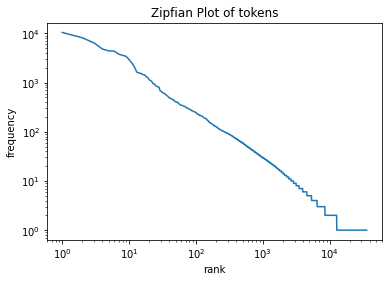

In [26]:
# Draw the frequency of whitespace-separated words

import matplotlib.pyplot as plt 

zipfian_data = list(dict(sorted(tok_count.items(), key=lambda item: item[1],reverse=True)).values())
rank_data = list(range(1,len(zipfian_data)+1))
fig, ax = plt.subplots()
ax.set_xscale('log', basex=10)
ax.set_yscale('log', basey=10)
plt.plot(rank_data,zipfian_data) 
plt.xlabel('rank') 
plt.ylabel('frequency')
plt.title('Zipfian Plot of tokens')
plt.show() 


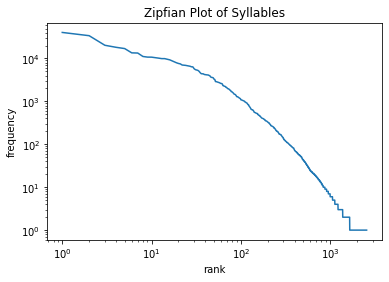

In [27]:
# Syllables 
zipfian_data = list(dict(sorted(sy_count.items(), key=lambda item: item[1],reverse=True)).values())
rank_data = list(range(1,len(zipfian_data)+1))
fig, ax = plt.subplots()
ax.set_xscale('log', basex=10)
ax.set_yscale('log', basey=10)
plt.plot(rank_data,zipfian_data) 
plt.xlabel('rank') 
plt.ylabel('frequency')
plt.title('Zipfian Plot of Syllables')
plt.show() 


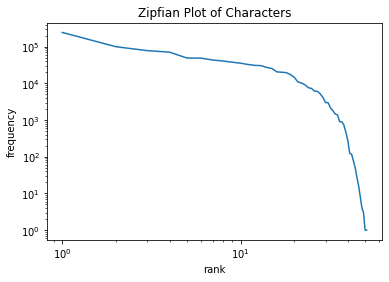

In [28]:
# Characters
zipfian_data = list(dict(sorted(ch_count.items(), key=lambda item: item[1],reverse=True)).values())
rank_data = list(range(1,len(zipfian_data)+1))
fig, ax = plt.subplots()
ax.set_xscale('log', basex=10)
ax.set_yscale('log', basey=10)
plt.plot(rank_data,zipfian_data) 
plt.xlabel('rank') 
plt.ylabel('frequency')
plt.title('Zipfian Plot of Characters')
plt.show() 


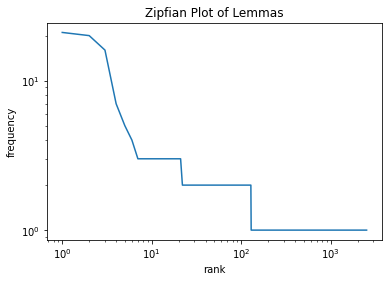

In [29]:
# lemmas
zipfian_data = list(dict(sorted(dict(Counter(lemma_token.values())).items(), key=lambda item: item[1],reverse=True)).values())
rank_data = list(range(1,len(zipfian_data)+1))
fig, ax = plt.subplots()
ax.set_xscale('log', basex=10)
ax.set_yscale('log', basey=10)
plt.plot(rank_data,zipfian_data) 
plt.xlabel('rank') 
plt.ylabel('frequency')
plt.title('Zipfian Plot of Lemmas')
plt.show() 


In [30]:
# Ignoring the outliers the text follows the Zipf's law : f ∝ 1/r i.e.  f · r = constant
# 1. For whitespace seperated words it clearly follows Zipf's law
# 2. For Syllables it also clearly follows Zipf's law
# 3. For Character, higher rank character doesnot follow Zipf's law
# 4. For Lemmas, it doesnot follow Zipf's law

**Solution 7 starts here:**

In [31]:
# 7a. Given a lemma and the corresponding surface form, derive the suffix. Do an end
# stripping from the surface form till the lemma or a subset of the lemma is reached.

# Dictionary of suffix in SLP1
suffix_list = []
for key,value in lemma_token.items():
  i = 0
  sufix_index = 0
  max_stringLen = min(len(key),len(value))
  for i in range(0,max_stringLen):
    if key[i] != value[i]:
      sufix_index = i
      break
  if sufix_index != 0:
    suffix = key[sufix_index:]
    # print(key,value, suffix)
    suffix_list.append(suffix)

suffix_list = dict(sorted(dict(Counter(suffix_list)).items(), key=lambda item: item[1],reverse=True))

# Dictionary of suffix converted into Devanagri
hindi_suffix_list = dict()
for key,value in suffix_list.items():
  hindi_suffix_list[transliterate(key, sanscript.SLP1, sanscript.DEVANAGARI)] = value
# print(transliterate("oM", sanscript.SLP1, sanscript.DEVANAGARI))


In [32]:
print(suffix_list)
print(hindi_suffix_list)

{'oM': 108, 'e': 65, 'iyoM': 31, 'I': 22, 'M': 6, 'A': 5, '0a': 5, 'eM': 5, 'IM': 4, '0e': 4, '0I': 3, '0A': 3, 'isa': 2, 'o': 2, 'iyAM': 2, '0oM': 2, 'sa': 2, 'isameM': 1, 'inameM': 1, 'inheM': 1, '0avAla': 1, '0osa': 1, 'isakA': 1, 'isane': 1, 'isase': 1, 'isI': 1, 'atA': 1, 'uJe': 1, 'ndrIya': 1, 'ndra': 1, 'Ata': 1, 'ise': 1, 'ere': 1, 'isake': 1, 'Mti': 1, 'ina': 1, '0uP0iyA': 1, '0uPiyA': 1, 'ArI': 1, 'erI': 1, '0urga': 1, '0atI': 1, 'Are': 1, 'inhoMne': 1, 'isakI': 1, 'isako': 1, 'MtIsa': 1, 'uoM': 1, 'ArA': 1, '0aCAq0a': 1, 'MDere': 1, 'inako': 1, '0iyoM': 1, '0Ij0a': 1, 'inase': 1, 'MDerA': 1, '0AbalA': 1, 'ntaraRa': 1}
{'ओं': 108, 'ए': 65, 'इयों': 31, 'ई': 22, 'ं': 6, 'आ': 5, '०अ': 5, 'एं': 5, 'ईं': 4, '०ए': 4, '०ई': 3, '०आ': 3, 'इस': 2, 'ओ': 2, 'इयां': 2, '०ओं': 2, 'स': 2, 'इसमें': 1, 'इनमें': 1, 'इन्हें': 1, '०अवाल': 1, '०ओस': 1, 'इसका': 1, 'इसने': 1, 'इससे': 1, 'इसी': 1, 'अता': 1, 'उझे': 1, 'न्द्रीय': 1, 'न्द्र': 1, 'आत': 1, 'इसे': 1, 'एरे': 1, 'इसके': 1, 'ंति': 1, 'इन': 1

In [110]:
# 7b. From your knowledge of language, mark the ones that are correct
correct_suffix_list = {'ओं': 108, 'ए': 65, 'इयों': 31, 'ई': 22, 'ं': 6, 'आ': 5, 'एं': 5, 'ईं': 4, '०ए': 4, '०ई': 3, '०आ': 3, 'ओ': 2, 'इयां': 2, '०ओं': 2, 'स': 2, 'तव': 1, '०अवाल': 1, '०ओस': 1, 'इसका': 1,  'अता': 1, 'उझे': 1, 'न्द्रीय': 1, 'न्द्र': 1}
incorrect_suffix_list = {'०अ': 5, 'इस': 2,'इसमें': 1,'इनमें': 1, 'इन्हें': 1, 'तौड़': 1,'इसने': 1, 'इससे': 1, 'इसी': 1}


In [36]:
# Saving the results
# Saving vocab size from BPE 
with open('/content/drive/MyDrive/NLPassn1/bpe_vocab_1k.txt', 'w') as f:
    for line in vocab_1K:
        f.write(f"{line}\n")

with open('/content/drive/MyDrive/NLPassn1/bpe_vocab_2k.txt', 'w') as f:
    for line in vocab_2K:
        f.write(f"{line}\n")

with open('/content/drive/MyDrive/NLPassn1/bpe_vocab_5k.txt', 'w') as f:
    for line in vocab_5K:
        f.write(f"{line}\n")

with open('/content/drive/MyDrive/NLPassn1/bpe_vocab_10k.txt', 'w') as f:
    for line in vocab_10K:
        f.write(f"{line}\n")

In [37]:
# Saving the top 50 suffix in SLP1 and in Hindi
with open('/content/drive/MyDrive/NLPassn1/50suffix_slp.txt', 'w') as f:
    for key,value in suffix_list.items():
        f.write(f"{key,value}\n")

with open('/content/drive/MyDrive/NLPassn1/50suffix_hindi.txt', 'w') as f:
    for key,value in hindi_suffix_list.items():
        f.write(f"{key,value}\n")